In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
%matplotlib inline

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
target = df_train['Survived']

In [5]:
df_train = df_train.drop(labels = ['Name','Ticket','PassengerId','Fare','Cabin','Survived'],axis=1)
df_train['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

df_test = df_test.drop(labels = ['Name','Ticket','PassengerId','Fare','Cabin'],axis=1)
df_test['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)


temp = pd.get_dummies(pd.concat([df_train,df_test],keys=[0,1]), columns=['Pclass','Parch','Embarked'])
# Selecting data from multi index and assigning them i.e
df_train,df_test = temp.xs(0),temp.xs(1)
df_train.head()


,Sex,Age,SibSp,Pclass_1,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1
1,1,38.0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1,26.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,35.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1


In [6]:
input_matrix = df_train
from sklearn.impute import SimpleImputer
imp=SimpleImputer( missing_values=np.nan,strategy='mean',fill_value=None,verbose=0,copy=True )
input_matrix=imp.fit_transform(input_matrix)
from sklearn import preprocessing
input_matrix= preprocessing.StandardScaler().fit(input_matrix).transform(input_matrix)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Split Data for training and testing
X_train, X_test, y_train, y_test = train_test_split(input_matrix, target,test_size=0.33)
#Train Model and Predict
acc = []
for i in range(1,12):
    print ("K=",i)
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

K= 1
K= 2
K= 3
K= 4
K= 5
K= 6
K= 7
K= 8
K= 9
K= 10
K= 11


Maximum accuracy: 0.7864406779661017 at K = 4


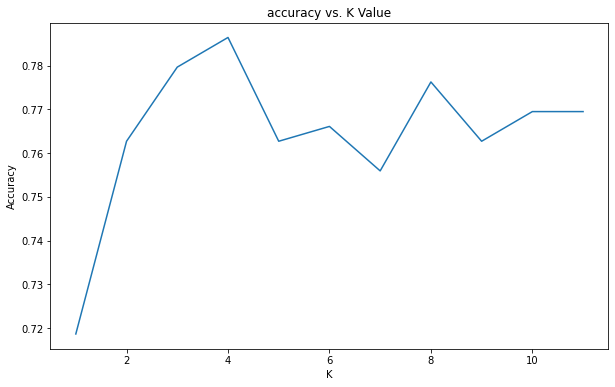

In [8]:
plt.figure(figsize=(10,6))
plt.plot(range(1,12),acc)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc))+1)

In [9]:
i=acc.index(max(acc))+1
neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)

In [10]:
from sklearn import svm

#Finding best kernel
knls = ['linear', 'rbf', 'sigmoid']
acc_svm = []
for kernel in knls:
    clf_krnl = svm.SVC(kernel=kernel,gamma="auto").fit(X_train, y_train)
    svm_predict = clf_krnl.predict(X_test)
    acc_svm.append(metrics.accuracy_score(y_test, svm_predict)) 
    
print("Maximum accuracy:",max(acc_svm),"with Kernel =",knls[acc_svm.index(max(acc_svm))])

Maximum accuracy: 0.7898305084745763 with Kernel = rbf


In [11]:
#Training the model with best kernel 
kernel="rbf"
clf_krnl = svm.SVC(kernel=kernel,gamma="auto").fit(X_train, y_train)

In [12]:
from sklearn import tree
#Train the model
clf_tree =  tree.DecisionTreeClassifier().fit(X_train,y_train)

In [13]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train,y_train)

In [14]:
#prepare test data
input_test_matrix = df_test
imp=SimpleImputer( missing_values=np.nan,strategy='mean',fill_value=None,verbose=0,copy=True )
input_test_matrix=imp.fit_transform(input_test_matrix)
input_test_matrix= preprocessing.StandardScaler().fit(input_test_matrix).transform(input_test_matrix)

In [15]:
y_pred = neigh.predict(input_test_matrix)
yhat_svm = clf_krnl.predict(input_test_matrix)
y_tree =clf_tree.predict(input_test_matrix)
y_lr = LR.predict(input_test_matrix)

In [16]:
import csv
with open('submission.csv', 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['PassengerId', 'Survived'])
    for i,v in enumerate(y_lr):
        csvwriter.writerow([i+892,str(v)])

In [17]:
df_output = pd.read_csv('/kaggle/working/submission.csv')
df_output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
